
# Project: Investigate a Dataset Firearm Background Checks

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>This dataset comes from the FBI's National Instant Criminal Background Check System.
The FBI provides data on the number of firearm checks per several attributes, noteably month and state.
This data set contains data that started to get gathered in 1998.


In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
*Here I will be using pandas to explore the data set annd build an intuition about the structure of the data as a whole to enable smooth exploration in the next steps.*
### General Properties

In [2]:
df=pd.read_csv("nics-firearm-background-checks.csv")
# totals is sum of every numerical column
df.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2021-06,Alabama,31515.0,455.0,21625.0,13805.0,1448.0,903,1.0,32.0,...,0.0,0.0,0.0,33.0,24.0,5.0,0.0,2.0,0.0,72284
1,2021-06,Alaska,299.0,20.0,2964.0,2388.0,279.0,187,0.0,1.0,...,0.0,0.0,0.0,10.0,16.0,0.0,0.0,0.0,0.0,6415


*adjust maximum displayed columns for better inspection*

In [3]:
pd.set_option('display.max_columns', 27)

In [4]:
df.shape

(14960, 27)

In [5]:
df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,14936.000000,3.575000e+03,14940.000000,14941.000000,7975.000000,14960.000000,14937.000000,13017.000000,13015.000000,7590.000000,13020.000000,13019.000000,7590.000000,4675.000000,4620.000000,4290.000000,3465.000000,3300.000000,5225.000000,5225.000000,5225.000000,4950.000000,5225.000000,4730.000000,1.496000e+04
mean,7270.713042,9.328215e+03,7148.896586,7977.682886,554.185956,301.204880,52.542345,5.181993,7.515559,0.396179,446.313441,566.756971,2.660738,60.984599,14.115152,3.064336,0.151515,0.160606,37.440766,24.919043,4.132057,0.972929,0.927273,0.131290,2.618674e+04
std,25943.012877,6.210166e+04,10651.223168,9215.739326,1382.413355,780.155167,560.259585,11.418190,15.816793,1.428845,856.805937,906.427275,6.166716,148.739901,43.578113,22.507335,1.007686,1.014129,303.795207,134.414060,27.472034,4.825095,3.903025,0.524605,4.855120e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,1040.000000,2177.000000,30.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.067750e+03
50%,819.000000,0.000000e+00,3541.000000,5272.000000,180.000000,135.000000,0.000000,0.000000,1.000000,0.000000,55.000000,169.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.346550e+04
75%,5649.500000,8.250000e+01,8671.000000,10755.000000,574.500000,333.000000,0.000000,5.000000,8.000000,0.000000,603.250000,808.000000,3.000000,49.000000,10.000000,1.000000,0.000000,0.000000,14.000000,14.000000,1.000000,0.000000,0.000000,0.000000,2.924800e+04
max,522188.000000,1.350676e+06,147714.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,10046.000000,8831.000000,104.000000,2159.000000,1303.000000,592.000000,13.000000,12.000000,10623.000000,4159.000000,829.000000,70.000000,62.000000,18.000000,1.427917e+06


*check for any duplicates*

In [6]:
sum(df.duplicated())

0

In [7]:
df[df.other.isnull()].shape

(6985, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14960 entries, 0 to 14959
Data columns (total 27 columns):
month                        14960 non-null object
state                        14960 non-null object
permit                       14936 non-null float64
permit_recheck               3575 non-null float64
handgun                      14940 non-null float64
long_gun                     14941 non-null float64
other                        7975 non-null float64
multiple                     14960 non-null int64
admin                        14937 non-null float64
prepawn_handgun              13017 non-null float64
prepawn_long_gun             13015 non-null float64
prepawn_other                7590 non-null float64
redemption_handgun           13020 non-null float64
redemption_long_gun          13019 non-null float64
redemption_other             7590 non-null float64
returned_handgun             4675 non-null float64
returned_long_gun            4620 non-null float64
returned_other   

In [9]:
# df[df.rentals_handgun.isnull()].plot(kind='bar');

*create a dataframe grouped by states to apply easier analysis on it*

In [10]:
df.month = pd.to_datetime(df['month'])

In [11]:
data = [df['state'],df['month'].dt.month,df['permit']]
headers = ['state','month','permit']
df_month = pd.concat(data, axis=1, keys=headers)
df_month_sum=df_month.groupby('month')
df_month_sum.head(1)

,state,month,permit
0,Alabama,6,31515.0
55,Alabama,5,28248.0
110,Alabama,4,35936.0
165,Alabama,3,42992.0
220,Alabama,2,31803.0
275,Alabama,1,39955.0
330,Alabama,12,33421.0
385,Alabama,11,30694.0
440,Alabama,10,32038.0
495,Alabama,9,33228.0


### Data Cleaning (preparing dataset for furhter exploration!)
>1. Remove unnecessary columns such as'totals','return_to_seller_other','returned_other','redemption_other','prepawn_other' and 'other'.
>2. Changing month column from string to date format.
>3. Filling th rest of the missing values with mean values.

### convert month to a datetime object for ease of access an create a new year column

In [13]:
type(df['month'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df.month = pd.to_datetime(df['month'])

In [15]:
df['year']=df.month.dt.year

### remove the following columns because they contain several null values and do not serve great value in our investigation anyways

In [16]:
#delete totals and create a new more accurate column
drop_cols=['totals','return_to_seller_other','returned_other','redemption_other','prepawn_other','other','totals']
df.drop(drop_cols,axis=1,inplace=True)

### fill the rest of missing values (NaN) with the mean value, all of them should be numerical

In [17]:
df.fillna(df.mean(),inplace=True) #note only numeric data will be filled not

*make sure that there are indeed no missing values*

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14960 entries, 0 to 14959
Data columns (total 22 columns):
month                        14960 non-null datetime64[ns]
state                        14960 non-null object
permit                       14960 non-null float64
permit_recheck               14960 non-null float64
handgun                      14960 non-null float64
long_gun                     14960 non-null float64
multiple                     14960 non-null int64
admin                        14960 non-null float64
prepawn_handgun              14960 non-null float64
prepawn_long_gun             14960 non-null float64
redemption_handgun           14960 non-null float64
redemption_long_gun          14960 non-null float64
returned_handgun             14960 non-null float64
returned_long_gun            14960 non-null float64
rentals_handgun              14960 non-null float64
rentals_long_gun             14960 non-null float64
private_sale_handgun         14960 non-null float64
pri

<a id='eda'></a>
## Exploratory Data Analysis

### Which particular places played the biggest/least role in permits?

### explore where/when the most permits took place in a single month

In [19]:
index=df['permit'].idxmax()
(df.iloc[index]['state'],df.iloc[index].month,df.iloc[index]['permit'])

('North Carolina', Timestamp('2014-03-01 00:00:00'), 522188.0)

### explore where/when the least permits took place in a single month

In [20]:
index=df['permit'].idxmin()
(df.iloc[index]['state'],df.iloc[index]['permit'])

('Guam', 0.0)

*Since the least amount is zero I am interested to know how many times it was the case that it is zero permits in a month*

In [21]:
df[df.permit==0].shape[0]

5005

*See when the no permits per done in an entire month and see which years had the most of these month*

In [22]:
df_noPermits=df[df.permit==0].groupby('year')['year','state']
df_noPermits.head()
# df_noPermits.head(5).plot(kind='barh')

,year,state
11,2021,Guam
21,2021,Mariana Islands
32,2021,New Jersey
41,2021,Puerto Rico
42,2021,Rhode Island
341,2020,Guam
351,2020,Mariana Islands
362,2020,New Jersey
371,2020,Puerto Rico
372,2020,Rhode Island


In [23]:
# af=df_noPermits.plot();

## Which states contribute the most in permits?

### see the average number of permits per state

In [24]:
df_statePermit=df.groupby('state')['permit'].mean()
df_statePermit.head()

state
Alabama        8711.338235
Alaska           85.139706
Arizona        3799.040441
Arkansas       2515.518382
California    29762.621324
Name: permit, dtype: float64

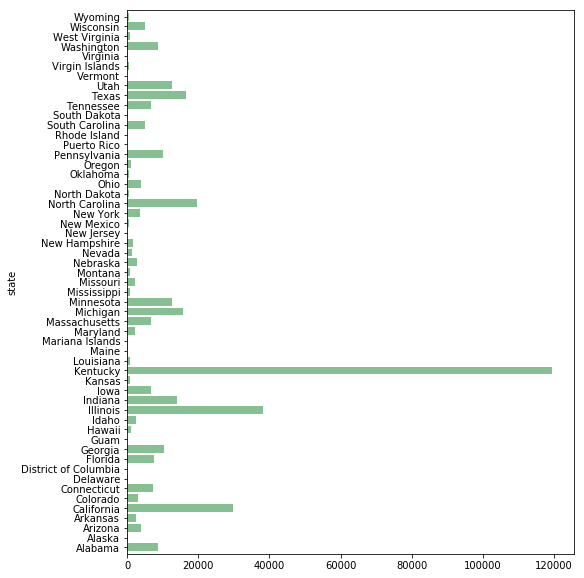

In [25]:
df_statePermit.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.8);

### see the average number of permits per month

In [26]:
df['exactMonth']=df.month.dt.month

In [27]:
df_monthPermit=df.groupby('exactMonth')['permit'].mean()
df_monthPermit.head()

exactMonth
1    8037.283341
2    7653.155051
3    8957.621681
4    7765.933934
5    7131.053301
Name: permit, dtype: float64

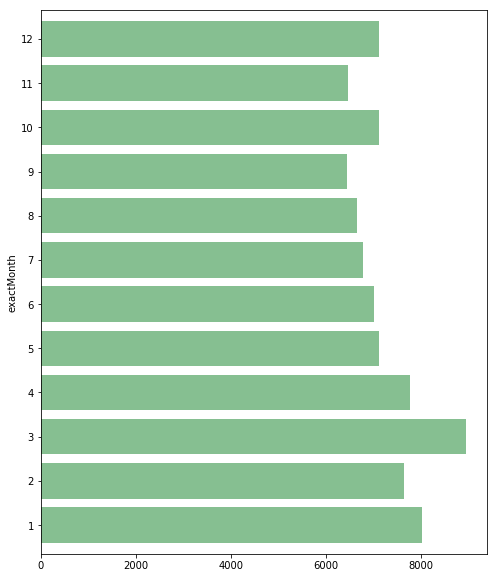

In [28]:
df_monthPermit.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.8);

In [29]:
### Which states contribute the most in permits?

### When did the most permits occur?

### see the average number of permits per year

In [30]:
df_yearPermit=df.groupby('year')['permit'].mean()
df_yearPermit.head()

year
1998     776.724664
1999    1649.386350
2000    1860.324242
2001    2133.845455
2002    2065.471212
Name: permit, dtype: float64

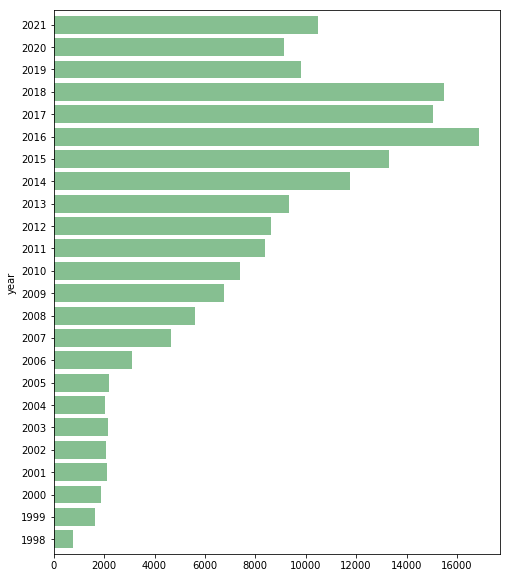

In [31]:
df_yearPermit.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.8);

<a id='conclusions'></a>
## Conclusions
> After this miniture investigation anf analysis on the firearm background check dataset here are some of my realizations:
> 

>**For simplicity I consider the nummber of permits as the main metric of firearm possession as this is the most reliable source of data we actually have and because the number of possession with no permits sre ratther rough estimates.**
>
>-  though March is the month with the most amount of permits over the years, the data shows that there is no significant variance between the month except a slight decrease of permit amounts in the summer months 7-9
>-  The number of permits kept increasing gradually over the years starting 1998 until its peak in in 2016 and then a slight drop drop perhaps due to the covid 19 situation
>-  Kentuckty recorded the maximum maount of permits with no close contender, however it can be seen that states like north Carolina, Utah,Texas and the likes have a decent amount of permits on their own when compared to islands like guam,hawai etc. that have almost zero contribution to the permit amounts
>
>Again my conclusion depend on the validity of the data.
With datasets gathered over long amount of times it must be stated that errors are likely to occur and thus the analysis may not portray the whole picture un that regard.